# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python LECTURE 5 </span>
## <span style="color:orange"> Introduction to KERAS </span>

<img src="Pictures/keras.png" width="400">

There are countless deep learning frameworks available today. Why use Keras rather than any other?

<a href="https://keras.io">Keras</a> is a high-level neural networks Application Programming Interface (API), written in Python, developed with a focus on enabling **fast experimentation**. Keras offers a consistent and simple API, which minimizes the number of user actions required for common use cases, and provides clear and actionable feedback upon user error.

Keras is capable of running on top of many deep learning backends such as **TensorFlow** (from Google), CNTK (from Microsoft), or Theano. This capability allows Keras model to be portable across all there backends.
<img src="Pictures/keras_tf.jpg" width="30%">

Keras is one of the most used Deep Learning Framework used by researchers, and is now part of the <a href="https://www.tensorflow.org/guide/keras">official TensorFlow Higher Level API</a> as <font color='red'>tf.keras</font>
<img src="Pictures/DL_framework_usage.png" width="50%">

Keras models can be trained on CPUs, Xeon Phi and any GPU device.

## Building a Model with Keras

The core data structure of Keras is the <a href="https://keras.io/models/about-keras-models/">Model</a> which is basically a container of one or more <a href="https://keras.io/layers/core/">Layers</a>.

There are two main types of models available in Keras: the Sequential model and the Model class, the latter used to create advanced models.

The simplest type of model is the Sequential model, which is a linear stack of layers. Each layer is added to the model using the <font color='red'>.add()</font> method of the Sequential model object.

The model needs to know what input shape it should expect. The first layer in a Sequential model (and only the first) needs to receive information about its input shape, specifing the <font color='red'>input_shape</font> argument.  The following layers can do automatic shape inference from the shape of their own predecessor layers.

In [14]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.


import tensorflow
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation #dense, tutti i neuroni prendono in input da tutti e danno a tu

model = Sequential()
# Adds to the model a densely-connected layer with 27 units with input shape 2, an (x,y) pair:
model.add(Dense(27, input_shape=(2,), activation='relu'))
# Adds another layer with 18 units, each connected to 27 outputs of previous layer
model.add(Dense(18, activation='relu'))
# Last layer with 9 units, each connected to 18 outputs of previous layer
model.add(Dense(9, activation='softmax')) #9 neuroni di output, vorrei che si accendesse quello che identifica in modo corretto la classe del punto: attivazione
#softmax, genera un vettore di probabilità, si usa per classificazione. Non per regressione.

Keras provides many types of <a href="https://keras.io/layers/about-keras-layers/"><b>layers</b></a> and <a href="https://keras.io/activations/"><b>activation functions</b></a> implementations.

## Types and most common layers

### Dense

Just adds a regular densely-connected NN layer.
<img src="Pictures/dense_layers.png" width="400">

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font color='grey'>#as first layer in a sequential model:</font><br />
<font face="Courier">model = Sequential()</font><br />
<font face="Courier">model.add(Dense(32, input_shape=(16,)))</font><br />
<font color='grey'>#It means 16 input parameters, with 32 neurons in the first hidden layer</font><br /><br />
<font color='grey'>#after the first layer, you don't need to specify the size of the input anymore:</font><br />
<font face="Courier">model.add(Dense(32))</font>
</p>

### Dropout

Applies Dropout to the input. Dropout consists in randomly setting a fraction of input units to 0 at each update during training time. Dropout is a technique used to prevent overfitting on neural networks
<img src="Pictures/dropout.png" width="600">

Dropout improves generalization because it forces your layer to learn with different neurons the same "concept". During the prediction phase the dropout is deactivated.

spengono in maniera casuale alcune connessioni, per evitare overfitting. imponi alla rete la necessità di funzionare anche in condizioni più difficile. la eserciti a non fidarsi troppo dei dati di input. l'alternativa è inserire del rumore casuale

### Convolutional layers

A Convolutional Neural Network is composed of layers that filter(convolve) the inputs to get useful information.
<img src="Pictures/conv2d.gif" width="400">
These convolutional layers have parameters(kernel) that are learned so that these filters are adjusted automatically to extract the most useful information for the task at hand.
<img src="Pictures/conv_example.gif" width="400">

These layers creates a convolution kernel that is convolved with the layer inputs; some examples are:

- **Conv1D**: 1D convolutional layer (typically, temporal convolution)
- **Conv2D**: 2D convolutional layer (typically, spatial convolution over images)
- **Conv3D**: 3D convolutional layer (e.g. spatial convolution over volumes)

### Pooling  layers

A pooling layer is used to reduce the spatial dimensions on a convolutional neural network, basically this is what you gain:

- By having less spatial information you gain computation performance
- Less spatial information also means less parameters, so less chance to over-fit
<img src="Pictures/pooling.jpg" width="400">

Some examples are:

- **MaxPooling1D/AveragePooling1D**: Max/Average pooling operation for 1D (e.g. temporal) data
- **MaxPooling2D/AveragePooling2D**: Max/Average pooling operation for 2D (e.g. images) data
- **MaxPooling3D/AveragePooling3D**: Max/Average pooling operation for 3D data

### Normalization  layers: BatchNormalization

Batch normalization layer. Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
<img src="Pictures/batchN.png" width="400">

We can have, in fact, the following problem: As a network trains, weights in early layers change and as a result, the inputs of later layers vary wildly. Each layer must readjust its weights to the varying distribution of every batch of inputs. This slows model training. If we could make layer inputs more similar in distribution, the network could focus on learning the difference between classes. Another effect of varied batch distribution is vanishing gradients. The vanishing gradient problem is a big deal, particularly for the sigmoid activation function.
<img src="Pictures/vanishingG.png" width="600">

Batch normalization mitigates the effects of a varied layer inputs. By normalizing the output of neurons, the activation function will only receive inputs close to zero. This ensures a non-vanishing gradient.
<img src="Pictures/bnorm.png" width="800">

### Regularization/Noise layers

Some examples:

- **GaussianNoise**: Apply additive zero-centered Gaussian noise. This is useful to mitigate overfitting (you could see it as a form of random data augmentation). Gaussian Noise (GS) is a natural choice as corruption process for real valued inputs. As it is a regularization layer, it is only active at training time.
- **GaussianDropout**: Apply multiplicative 1-centered Gaussian noise
- **AlphaDropout**: it is a Dropout that keeps mean and variance of inputs to their original values, in order to ensure the self-normalizing property even after this dropout.

#### Let's add  some steps in our example ...

In [15]:
from tensorflow.keras import backend, activations
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-3, 3, 0.1)

... and let's go on with some more description of Keras ...

## Activation functions

The <font color='red'>activation</font> argument specifies the activation function for the current layer. By default, no activation is applied. Activation functions are used to modify the output response of the standard *dot( input, weights )* operation performed by each node of a neural network layer. 

You can think the output of a node as:<br>
**output = activation( dot( input, weight ) + bias )**

Keras provide several predefined activation functions which can be used to enhance, dump, model the intensity of the basic response of the layer.

### Activation functions with open bounds

These activation functions share the property of having no bounds over the range values of output. 
These functions are very versatile (most used activation is **relu**), yet a different response is provided on positive and negative input values.

- The simplest activation function is the linear response $f(x) = x$, which in practice does not alter the response of the default **dot(input, weight)** kernel operation of a single node of a layer.
- Another simple open bounds activation functions is the exponential function, which enhances response of high input values over lower ones.

Other open bounds activation functions are **elu, selu, relu, softplus** which are later described.

### softplus

'softplus' implements the following activation function: $f(x) = \ln( 1 + \exp(x) )$

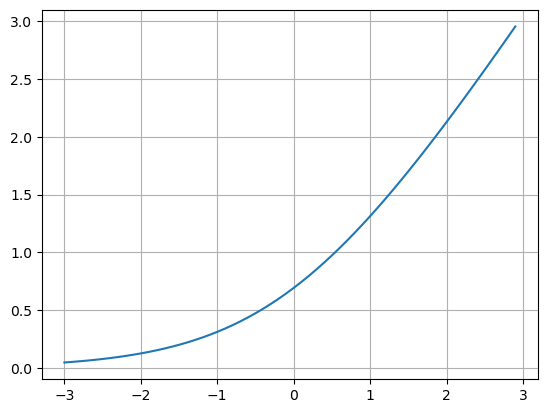

In [16]:
plt.plot(x, backend.eval(activations.softplus(x)))
plt.grid(True)
plt.show()

### elu

'elu' stands for exponential linear unit. The exponential linear activation

$f(x)=x$ if $x > 0$ and $f(x)=\alpha(\exp(x)-1)$ if $x < 0$ (default: $\alpha=1.0$)

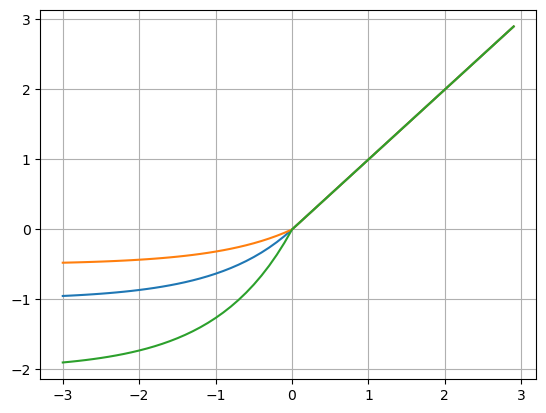

In [17]:
plt.plot(x, backend.eval(activations.elu(x, alpha=1.0))) # default
plt.plot(x, backend.eval(activations.elu(x, alpha=0.5))) 
plt.plot(x, backend.eval(activations.elu(x, alpha=2.0)))
plt.grid(True); plt.show()

### selu

'selu'  stands for scaled Exponential Linear Unit

$f(x)= \gamma f_{elu}(x, \alpha)$

where $\alpha$ and $\gamma$ are chosen so that the mean and variance of the inputs are preserved between two consecutive layers (as long as the weights are initialized correctly).

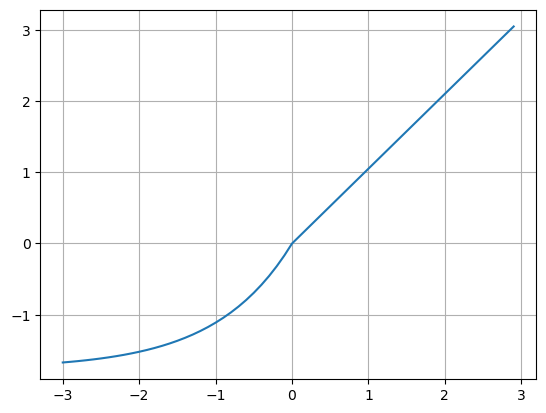

In [18]:
plt.plot(x, backend.eval(activations.selu(x)))
plt.grid(True); plt.show()

### relu

'relu' stands for rectified ELU. In its default form it is very similar to a linear response function $f(x) = max(0,x)$, which cutoff negative values and enhance stong input over lighter ones.
It is probably one of the **most used activation function in input or hidden layers of a neural network**.

RELU can be also customized with some parameters:
- max_value which sets a plateau over output maximum response value
- $\alpha$ which model response over **negative** input values

RELU form: <br />
f(x) = max_value , for x >= max_value, <br />
f(x) = x , for threshold <= x < max_value, <br />
f(x) = alpha * (x - threshold) otherwise.

In [19]:
plt.plot(x, backend.eval(activations.relu(x, alpha=0.0, max_value=None) )) # default
plt.grid(True)
plt.show()

TypeError: relu() got an unexpected keyword argument 'alpha'

In [ ]:
plt.plot(x, backend.eval(activations.relu(x, alpha=0.5, max_value=None) ))
plt.grid(True)
plt.show()

In [ ]:
plt.plot(x, backend.eval(activations.relu(x, alpha=0, max_value=4) ))
plt.grid()
plt.show()

### Activation functions with plateau

The following activation functions share the property of having a max plateu value for positive/negative values. These plateau functions are best used for "normalized" input and/or to put some "normalization" over output values.

### sigmoid

The sigmoid activation is: $f(x) = 1/(1+\exp(-x))$

In [ ]:
plt.plot(x, backend.eval(activations.sigmoid(x)))
plt.grid(True)
plt.ylim(0, 1)
plt.show()

### softsign

The softplus activation is: $f(x) = x/(|x| + 1)$

In [ ]:
plt.plot(x, backend.eval(activations.softsign(x)))
plt.grid(True); plt.ylim(-1, 1); plt.show()

### tanh

In [ ]:
plt.plot(x, backend.eval(activations.tanh(x)))
plt.grid(True); plt.show()

### softmax

In mathematics, the **softmax** function, also known as normalized exponential function, is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities. That is, prior to applying *softmax*, some vector components could be negative, or greater than one; and might not sum to 1; but after applying *softmax*, each component will be in the interval $(0,1)$ and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities:

$$
\sigma(\vec{z})_i = \frac{e^{z_i}}{\sum_{j=1}^N e^{z_j}}
\quad i=1,\dots,N \quad \vec{z}=\{ z_1, \dots, z_N\}
$$

Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes. 

The <i>softmax</i> activation function is commonly used in the last layer of a model to select a single output from many, for example to select the most probable identified item among a set in a <b>classification problem</b>. 

viene usato per creare l'output della rete. prende in input un vettore e restituisce un vettore di probabiltà. La somma delle componenti del vettori in uscita sarà 1

## Compile the model

After the model is constructed, we have to configure its learning process by calling the <font color='red'>compile</font> method. The compile phase is required to configure the following (required) element of the model:
- <a href="https://keras.io/optimizers/"><b>optimizer:</b></a> this object specifies the optimization algorithm which adapts the weights of the layers during the training procedure;
- <a href="https://keras.io/losses/"><b>loss:</b></a> this object specifies the function to minimize during the optimization;
- <a href="https://keras.io/metrics/"><b>metrics:</b></a> [optional] this objects judges the performance of your model and is used to **monitor** the training

In [ ]:
from tensorflow.keras import optimizers, losses, metrics

# Configure the model for mean-squared error regression.
model.compile(optimizer='sgd',       # stochastic gradient descent
              loss=losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])  # an optional list of metrics

You can either instantiate an **optimizer** before passing it to model.compile() , as in the following example, or you can call it by its name, as in the example above. In the latter case, the default parameters for the optimizer will be used:

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">from tensorflow.keras import optimizers</font><br />
<font face="Courier">sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)</font><br />
<font face="Courier">model.compile(loss='mean_squared_error', optimizer=sgd)</font>
</p>

### Optimizers
per tutti i nostri es, bata il primo. Se vogliamo esplorare qui ci sono un po' di info.
#### Stochastic gradient descent optimizer: SGD

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)</font>
</p>

Arguments:
- lr : float >= 0. Learning rate.
- momentum : float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
- decay : float >= 0. Learning rate decay over each update.
- nesterov : boolean. Whether to apply Nesterov momentum.

#### Adagrad

Adagrad is an optimizer with parameter-specific learning rates, which are **adapted** relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the learning rate.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)</font>
</p>

Arguments:
- lr : float >= 0. Initial learning rate.
- epsilon : float >= 0. If None, defaults to K.epsilon().
- decay : float >= 0. Learning rate decay over each update.

#### Adadelta

Adadelta is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done. It is recommended to leave the parameters of this optimizer at their default values.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)</font>
</p>

Arguments:
- lr : float >= 0. Initial learning rate, defaults to 1. It is recommended to leave it at the default value.
- rho : float >= 0. Adadelta decay factor, corresponding to fraction of gradient to keep at each time step.
- epsilon : float >= 0. Fuzz factor. If None, defaults to K.epsilon().
- decay : float >= 0. Initial learning rate decay.

Others optimizers: **Adam, Adamax, Nadam** 

### Losses

The Loss/Cost functions are mathematical functions that will answer how well your classifier is doing its job with the current set of parameters (weights and bias). One important step on supervised learning is the choice of the right loss function for the job/task.

**<b><font color='green'>Some available loss functions</font></b>** (lab=label):

#### mean_squared_error $= \frac{1}{N} \sum_{i=1}^N \left| y_i^{out}-y_i^{lab}\right|^2$
If using *sigmoid* as the activation function, the MSE loss function would suffer the problem of slow convergence (learning speed), for other activation funtions, it would not have such problem.

#### mean_absolute_error $= \frac{1}{N} \sum_{i=1}^N \left| y_i^{out}-y_i^{lab}\right|$
Because of the square, large errors have relatively greater influence on MSE than do the smaller error. Therefore, MAE is more robust to outliers since it does not make use of square. On the other hand, MSE is more useful if concerning about large errors whose consequences are much bigger than equivalent smaller ones.

#### mean_squared_logarithmic_error $=\frac{1}{N}\sum_{i=1}^N \left|\log\frac{y_i^{out}+1}{y_i^{lab}+1}\right|^2$
With MSLE, by taking the log of the predictions and actual values, what changes is the variance that you are measuring. It is usually used when you do not want to penalize huge differences in the predicted and the actual values when both predicted and true values are huge numbers. Another thing is that MSLE penalizes under-estimates more than over-estimates.

quando siamo vicini vogliamo un mean square error, ma quando siamo lontani ci allontaniamo linearmente

#### logcosh
Logarithm of the hyperbolic cosine of the prediction error. <code>log(cosh(x))</code> is approximately equal to $x^2/2$ for small $x$ and to $|x|-\log(2)$ for large $x$. This means that 'logcosh' works mostly like the mean squared error, but will not be so strongly affected by the occasional wildly incorrect prediction.


queste qui sotto sono per classificazione
#### categorical_crossentropy $=-\frac{1}{N}\sum_{i=1}^{N}\big(y_i^{out}\cdot\log(y_i^{lab})\big)$
when using the categorical_crossentropy loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample). In order to convert integer targets into categorical targets, you can use the Keras utility <code>to_categorical</code>

#### kullback_leibler_divergence $=\underbrace{{\frac{1}{N}\sum_{i=1}^{N}\big(y_i^{out}}\cdot\log(y_i^{out})\big)}_{\boldsymbol{entropy}}\underbrace{-\frac{1}{N}\sum_{i=1}^{N}\big(y_i^{out}\cdot\log(y_i^{lab})\big)}_{\boldsymbol{cross-entropy}}$
KL Divergence, also known as relative entropy, information divergence/gain, is a measure of how one probability distribution diverges from a second expected probability distribution.
The first term is entropy and the other is the cross entropy. KL divergence is a distribution-wise asymmetric measure and thus does not qualify as a statistical metric of spread. In the simple case, a KL divergence of 0 indicates that we can expect similar, if not the same, behavior of two different distributions, while a KL divergence of 1 indicates that the two distributions behave in such a different manner that the expectation given the first distribution approaches zero.

### Metrics

A metric is a function that is used to judge the performance of your model. Metric functions are to be supplied in the metrics parameter when a model is compiled. 

A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model. **You may use any of the loss functions as a metric function**.

Metric values are recorded at the end of each epoch on the training dataset. If a validation dataset is also provided, then the metric recorded is also calculated for the validation dataset.

In addition to loss functions some of other *metrics* that you can use in Keras on **classification problems** are:

#### binary_accuracy
Everything above 0.5 will be considered as correct.

#### categorical_accuracy
Checks to see if the index of the maximal true value is equal to the index of the maximal predicted value, i.e., takes the highest value to be the prediction and matches against the comparative set.

Regardless of whether your problem is a binary or multi-class classification problem, you can specify the ‘acc‘ metric to report on accuracy.

## Model Training Process

Once the model is compiled, we can check its status using the <b><font color='red'>summary</font></b> and get precious information on model composition, layer connections and number of parameters.

In [ ]:
model.summary()

Now it's time to learn how to train the model against a set of training data and monitor the optimization process and convergence using reported loss and accuracy measure.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n_train = 5000
n_valid = 500
# generate synthetic training dataset
x_train = np.zeros((n_train, 2))#ascissa e ordinata
y_train = np.zeros((n_train, 9))#9 categorie
# generate synthetic validation data
x_valid = np.zeros((n_valid, 2))
y_valid = np.zeros((n_valid, 9))

sigma = 0.2

for i in range(n_train):
    j = np.random.randint(0,9)
    y_train[i,j]=1
    if j == 0:
        mux, muy = 1, 1
    elif j == 1:
        mux, muy = 2, 1
    elif j == 2:
        mux, muy = 3, 1
    elif j == 3:
        mux, muy = 1, 2
    elif j == 4:
        mux, muy = 2, 2
    elif j == 5:
        mux, muy = 3, 2
    elif j == 6:
        mux, muy = 1, 3
    elif j == 7:
        mux, muy = 2, 3
    else:
        mux, muy = 3, 3
    x_train[i,0] = np.random.normal(mux, sigma)
    x_train[i,1] = np.random.normal(muy, sigma)

for i in range(n_valid):
    j = np.random.randint(0,9)
    y_valid[i,j]=1
    if j == 0:
        mux, muy = 1, 1
    elif j == 1:
        mux, muy = 2, 1
    elif j == 2:
        mux, muy = 3, 1
    elif j == 3:
        mux, muy = 1, 2
    elif j == 4:
        mux, muy = 2, 2
    elif j == 5:
        mux, muy = 3, 2
    elif j == 6:
        mux, muy = 1, 3
    elif j == 7:
        mux, muy = 2, 3
    else:
        mux, muy = 3, 3
    x_valid[i,0] = np.random.normal(mux, sigma)
    x_valid[i,1] = np.random.normal(muy, sigma)

plt.plot(x_train[:,0],x_train[:,1],'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Model Fit

The <code><font color='red'>.fit</font></code> method takes three important arguments:
- <code>x, y:</code> training input independent and dependent datasets
- <code>batch_size:</code> the model slices the data into smaller batches and iterates over these batches during training. This integer specifies the size of each batch.
- <code>epochs:</code> an epoch is one iteration over the entire input data (done in smaller batches).
- <code>validation_data:</code> [optional] validation data against which  compute the loss and metrics in inference mode at the end of each epoch.

In [ ]:
bsize = 32
# fit the model using training dataset
# over 50 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=bsize, epochs=50, 
          validation_data=(x_valid, y_valid))

A trained model contains fitted weights for each layer. We can inspect weights from each layers using the <font color='red'>get_weights</font> method, which returns an array of two arrays: the first are the weights belonging to input of the layer, the second are the weights associated to layer's bias.

In [ ]:
for l in model.layers:
    w = l.get_weights()
    print("layer nodes weights: ", w[0].shape)
    print("layer bias weights: ", w[1].shape)

## Model Evaluation and Prediction
Once the training process has completed, you can <code><font color='red'>evaluate</font></code> the model over different test dataset. The evaluate method returns the loss value and, if the model was compiled providing also a <em>metrics</em> argument, the metric values for the model in test mode.

In [20]:
#model.evaluate(x_valid, y_valid, batch_size=32)
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])      #plt.plot(history.history['acc']) #for generic 'accuracy'
plt.plot(history.history['val_categorical_accuracy'])  #plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test/validation'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test/validation'], loc='best')
plt.show()

ValueError: You must call `compile()` before using the model.

The <code><font color='red'>predict</font></code> method generates output prediction from an input dataset provided to the model.

When running a prediction, the samples in a batch are processed independently, in parallel, so the larger is the batch, the sooner the prediction task will complete.

In [ ]:
print("Input dataset shape: ", x_valid.shape)
# this model maps a 2 dims problem into an 9 dims
y_predicted = model.predict(x_valid, batch_size=128)
print("Predicted results shape: ", y_predicted.shape)
print(y_valid[4])
print(y_predicted[4])

## Save and Restore a Model
A trained model can be saved and stored to a file for later retreival. This allows you to checkpoint a model and resume training later without rebuilding and training from scratch.

Files are saved in HDF5 format, within all weight values, model's configuration and even the optimizer's configuration.

In [ ]:
save_model_path='Saved/intro_model.h5'
model.save(filepath=save_model_path, include_optimizer=True)

In [ ]:
model_old = tensorflow.keras.models.load_model(filepath=save_model_path)

In [ ]:
xp=np.zeros((1,2))
xp[0,0]=3.2
xp[0,1]=1.3
y_predicted = model_old.predict(xp)
print(y_predicted[0])

In [ ]:
import numpy as np
import math

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 10000)
x_valid = np.random.uniform(-1.5, 1.5, 2000)
y_train = np.random.uniform(-1.5, 1.5, 10000)
y_valid = np.random.uniform(-1.5, 1.5, 2000)
x_valid.sort()
y_valid.sort()
z_target = math.sin(x_valid**2+y_valid**2) # ideal (target) function

sigma = 0.1 # noise standard deviation
z_train = np.random.normal(math.sin(x_train**2+y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(math.sin(x_valid**2+y_valid**2), sigma)


